In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_theme()

In [2]:
readers = pd.read_csv("../data/readers.csv")
readers = readers.rename(columns={"id":"user_id", "art_id":"nzz_id"})
readers.head()

,user_id,nzz_id
0,1,ld.154103
1,1,ld.142559
2,1,1.18331199
3,1,ld.144819
4,1,ld.1293110


In [3]:
articles = pd.read_csv("../data/articles_cleaned.csv", parse_dates=["pub_date"])
articles.head()

,nzz_id,author,catchline,department,lead_text,pub_date,title,paragraph
0,ld.149648,Claudia Gabriel,Obligationenfonds mit fixer Laufzeit,Finanzen,Die Idee ist gut: Statt einer einzigen Obligat...,2017-03-09 08:01:21.000,Es gibt noch interessante Varianten,Die Idee ist gut: Statt einer einzigen Obligat...
1,1.18145900,Unknown,Fashion Week New York,Panorama,Zum Auftakt der Fashion Week in New York zeige...,2017-04-11 14:00:29.473,Fashion Week New York,NaN
2,ld.138769,Unknown,E-Banking-Ausfall,Finanzen,Seit Sonntag funktioniert das E-Banking der Po...,2017-01-09 13:55:00.000,Postfinance kämpft mit dem System,Seit Sonntag funktioniert das E-Banking der Po...
3,ld.143700,Unknown,Terror in Frankreich,International,Einen Tag nach dem Angriff auf Soldaten beim P...,2017-02-04 12:50:25.000,Louvre nach Macheten-Angriff wieder geöffnet,Einen Tag nach dem Angriff auf Soldaten beim P...
4,ld.149385,Unknown,Unglück in Panama,Panorama,Bei einem Busunglück in Panama sind 17 Persone...,2017-03-06 07:31:21.000,Bus prallt gegen eine Mauer und stürzt in Fluss,Bei einem Busunglück in Panama sind 17 Persone...


In [4]:
articles.dtypes

nzz_id                object
author                object
catchline             object
department            object
lead_text             object
pub_date      datetime64[ns]
title                 object
paragraph             object
dtype: object

In [5]:
article_popularity =readers["nzz_id"].value_counts(sort=True).rename_axis("nzz_id").reset_index(name="read_count")
article_popularity.head()

,nzz_id,read_count
0,1.18108994,222
1,ld.153477,206
2,ld.1086062,128
3,ld.153813,125
4,ld.140509,49


<AxesSubplot:xlabel='read_count', ylabel='Count'>

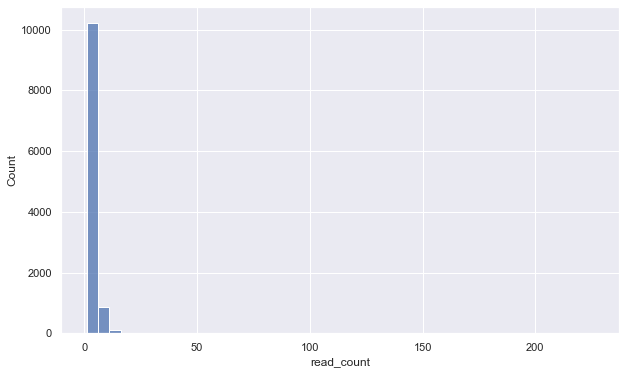

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(article_popularity, x="read_count", binwidth=5)

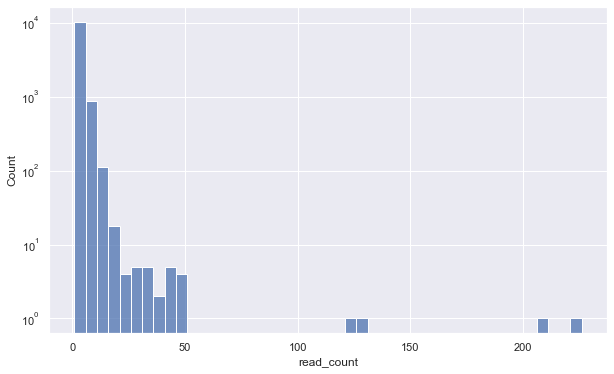

In [7]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(article_popularity, x="read_count", binwidth=5)
ax.set_yscale("log")

In [8]:
reader_popularity = readers["user_id"].value_counts(sort=True).rename_axis("user_id").reset_index(name="read_count")
reader_popularity.head()

,user_id,read_count
0,323,50
1,850,50
2,526,50
3,481,50
4,887,50


In [9]:
merged = article_popularity.merge(articles, on="nzz_id")
merged.head()

,nzz_id,read_count,author,catchline,department,lead_text,pub_date,title,paragraph
0,1.18108994,222,Unknown,Impressionen aus Tessin und Graubünden,Tessin,Die Kantone Graubünden und Tessin (Gastkanton ...,2017-04-11 13:59:48.182,Impressionen aus Tessin und Graubünden,NaN
1,ld.153477,206,Nino Maspoli,Asus Zenbook 3 im Test,Euro 2016,Asus verbaut in seinem neusten Zenbook leistun...,2017-03-26 05:02:00.000,Es fehlt die Liebe zum Detail,NaN
2,ld.1086062,128,Stephanie Kusma,Quiz,Spiele,NaN,2017-04-16 03:30:00.000,Testen Sie Ihr Wissen in Vogeleierkunde. Welch...,ark. Der Zürcher Fluglärm führt in Süddeutschl...
3,ld.153813,125,Unknown,Quiz,Spiele,Was ziert das Cover des zwölften Albums von Zü...,2017-03-27 14:15:12.898,Wie gut kennen Sie Kuno Lauener von Züri West?,NaN
4,ld.140509,49,Unknown,EU-Parlament,Video,Erstmals ist ein Italiener Präsident des EU-Pa...,2017-01-18 12:09:44.000,Auf Martin Schulz folgt Antonio Tajani,Erstmals ist ein Italiener Präsident des EU-Pa...


In [10]:
department_popularity = articles["department"].value_counts(sort=True).rename_axis("department").reset_index(name="article_count")
department_popularity.sort_values(by=["article_count"]).head()

,department,article_count
27,Euro 2016,1
26,Tessin,1
25,Spiele,2
24,Jahresrückblick 2016,6
23,Video,6


Text(0.5, 1.0, 'Liczba napisanych artykułów według kategorii')

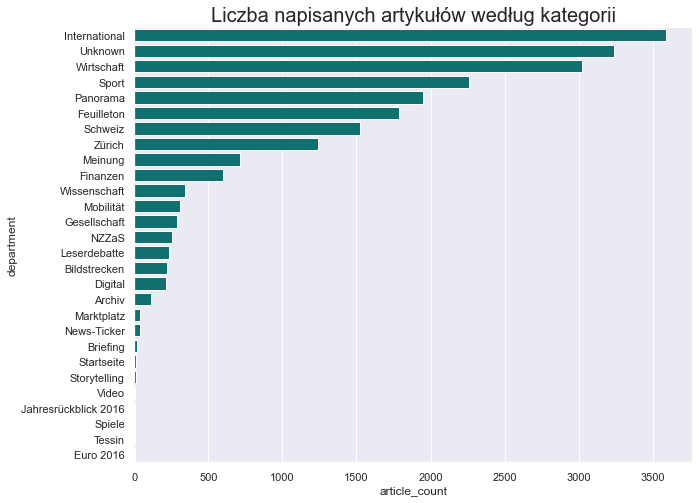

In [11]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(data=department_popularity, x="article_count", y="department", color="teal")
ax.set_title("Liczba napisanych artykułów według kategorii", fontsize=20)
#ax.set_yscale("log")

In [12]:
dep_grouped = merged.groupby(by=["department"]).sum().reset_index().sort_values(by="read_count",ascending=False)
dep_grouped.head()

,department,read_count
16,Panorama,2125
17,Schweiz,1978
6,Finanzen,1923
14,NZZaS,1910
5,Feuilleton,1903


Text(0.5, 1.0, 'Liczba przeczytań według kategorii')

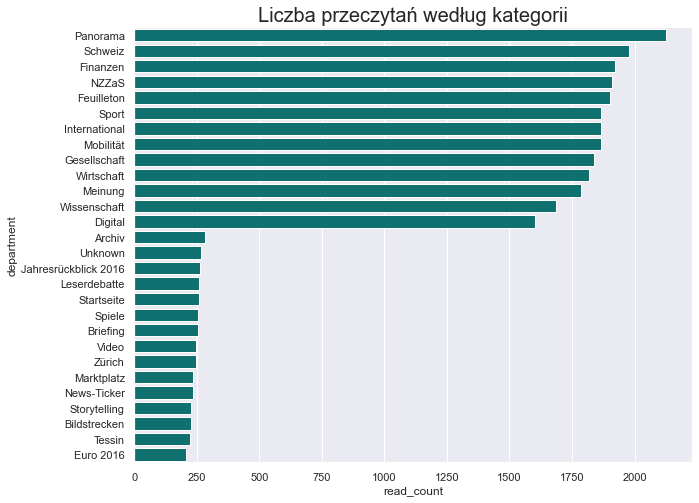

In [13]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(data=dep_grouped, x="read_count", y="department", color="teal")
ax.set_title("Liczba przeczytań według kategorii", fontsize=20)
#ax.set_xscale("log")

<AxesSubplot:xlabel='read_count', ylabel='Count'>

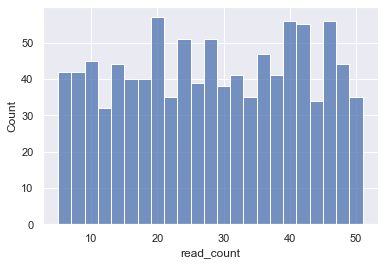

In [14]:
sns.histplot(reader_popularity, x="read_count", binwidth=2)

In [ ]:
# Add topic modeling for each topic
# Add word map for each topic
